In [1]:
import sys
import os

source_path = 'C:/Users/User/Desktop/Dyslexia project/Source'

if source_path not in sys.path:
    sys.path.append(source_path)
    

import data_manipulation as dm 
import data_visualization as dv
import data_processing as dp

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from scipy.stats import boxcox

In [4]:
data = dm.read_data('Cleaned_data.xlsx')
data

,participant,class,gender,laterality,BHK_raw_speed_score,BHK_raw_quality_score,median_Freq_speed,dist_Freq_speed,in_Air,Space_Between_Words,std_Density,median_Freq_tremolo,mean_d_P,std_d_P,mean_Pressure,dist_Freq_tilt_x,bandwidth_tilt_x,median_Freq_tilt_y,Dysgraphia,Age
0,S0995,CM1,m,l,207.000000,25.500000,0.001744,0.000218,0.621097,1617.671646,360.244714,0.003316,0.130777,3.562989,592.221130,0.000498,0.004491,0.003318,Yes,9
1,S0996,CE2,m,r,63.000000,35.000000,0.001564,0.000126,0.587173,1714.428471,303.268265,0.003233,0.039345,1.495864,375.740844,0.000910,0.004954,0.003324,Yes,9
2,S0997,CE1,m,r,74.000000,31.333333,0.002356,0.001056,0.610327,423.105339,267.878028,0.003295,-0.007538,0.562388,127.736338,0.000242,0.003083,0.003333,Yes,8
3,S1000,CE1,f,r,52.500000,31.000000,0.001599,0.000136,0.604755,2371.746011,205.989012,0.003344,0.030485,1.560180,427.952813,0.000604,0.005016,0.003273,Yes,8
4,S1001,CE2,f,r,86.333333,22.666667,0.002250,0.000899,0.770747,926.590647,230.280797,0.003338,0.025525,1.788618,319.640759,0.000704,0.004022,0.003388,Yes,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,S1376,CE1,m,r,105.500000,34.500000,0.001715,0.000263,0.385017,1033.910155,308.338614,0.003361,0.004184,1.371368,332.983967,0.000721,0.004639,0.003367,Yes,7
276,S1379,CM1,m,r,201.000000,28.500000,0.002029,0.000527,0.591674,699.553191,104.431172,0.003380,0.024090,1.821784,301.977176,0.000357,0.003769,0.003295,Yes,11
277,S1383,CM2,m,r,158.500000,25.000000,0.002119,0.000781,0.578211,668.460279,262.934937,0.003352,0.023631,1.149694,221.949038,0.000452,0.004270,0.003277,Yes,11
278,S1384,CM1,m,r,94.500000,25.000000,0.002154,0.000747,0.400375,75.451084,320.034516,0.003328,-0.005571,0.808330,185.984346,0.000195,0.003236,0.003336,Yes,10


In [5]:
data['Dysgraphia'].value_counts()

No     218
Yes     62
Name: Dysgraphia, dtype: int64

In [6]:
categorical_columns = list(data.select_dtypes('O').columns)

In [7]:
numerical_columns = [col for col in data.columns if col not in categorical_columns]

In [8]:
categorical_columns.remove('participant')

# Data Quality Tables

In [9]:
data[numerical_columns].describe()

,BHK_raw_speed_score,BHK_raw_quality_score,median_Freq_speed,dist_Freq_speed,in_Air,Space_Between_Words,std_Density,median_Freq_tremolo,mean_d_P,std_d_P,mean_Pressure,dist_Freq_tilt_x,bandwidth_tilt_x,median_Freq_tilt_y,Age
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,183.428824,17.214881,0.001449,0.000301,0.542368,1366.455259,197.582507,0.003209,0.188502,2.277098,478.117093,0.000257,0.003513,0.003340,8.785714
std,95.661307,7.663806,0.000354,0.000235,0.093239,405.613092,88.702982,0.000175,0.109440,0.733968,128.441221,0.000139,0.000379,0.000032,1.539379
min,36.734694,2.000000,0.001019,0.000067,0.236841,75.451084,0.124984,0.002647,-0.013711,0.562388,120.594022,0.000077,0.002854,0.003191,6.000000
25%,94.500000,11.500000,0.001222,0.000150,0.482454,1148.833894,131.255409,0.003100,0.097758,1.709713,392.049546,0.000198,0.003279,0.003327,8.000000
50%,171.750000,15.666667,0.001338,0.000250,0.541956,1350.390656,187.685320,0.003252,0.185686,2.241451,472.996391,0.000226,0.003446,0.003341,9.000000
75%,257.724609,21.000000,0.001503,0.000355,0.592507,1592.605611,260.338636,0.003335,0.260292,2.798529,560.223123,0.000254,0.003642,0.003358,10.000000
max,426.291080,46.000000,0.002861,0.001682,0.920067,3601.403094,459.023826,0.003599,0.509412,4.356649,814.843005,0.000956,0.005016,0.003431,12.000000


In [10]:
data[categorical_columns].describe()

,class,gender,laterality,Dysgraphia
count,280,280,280,280
unique,5,2,2,2
top,CM1,m,r,No
freq,64,152,247,218


# Correlation betwen numerical features

## Correlation matrix showing correlation values above 80 %

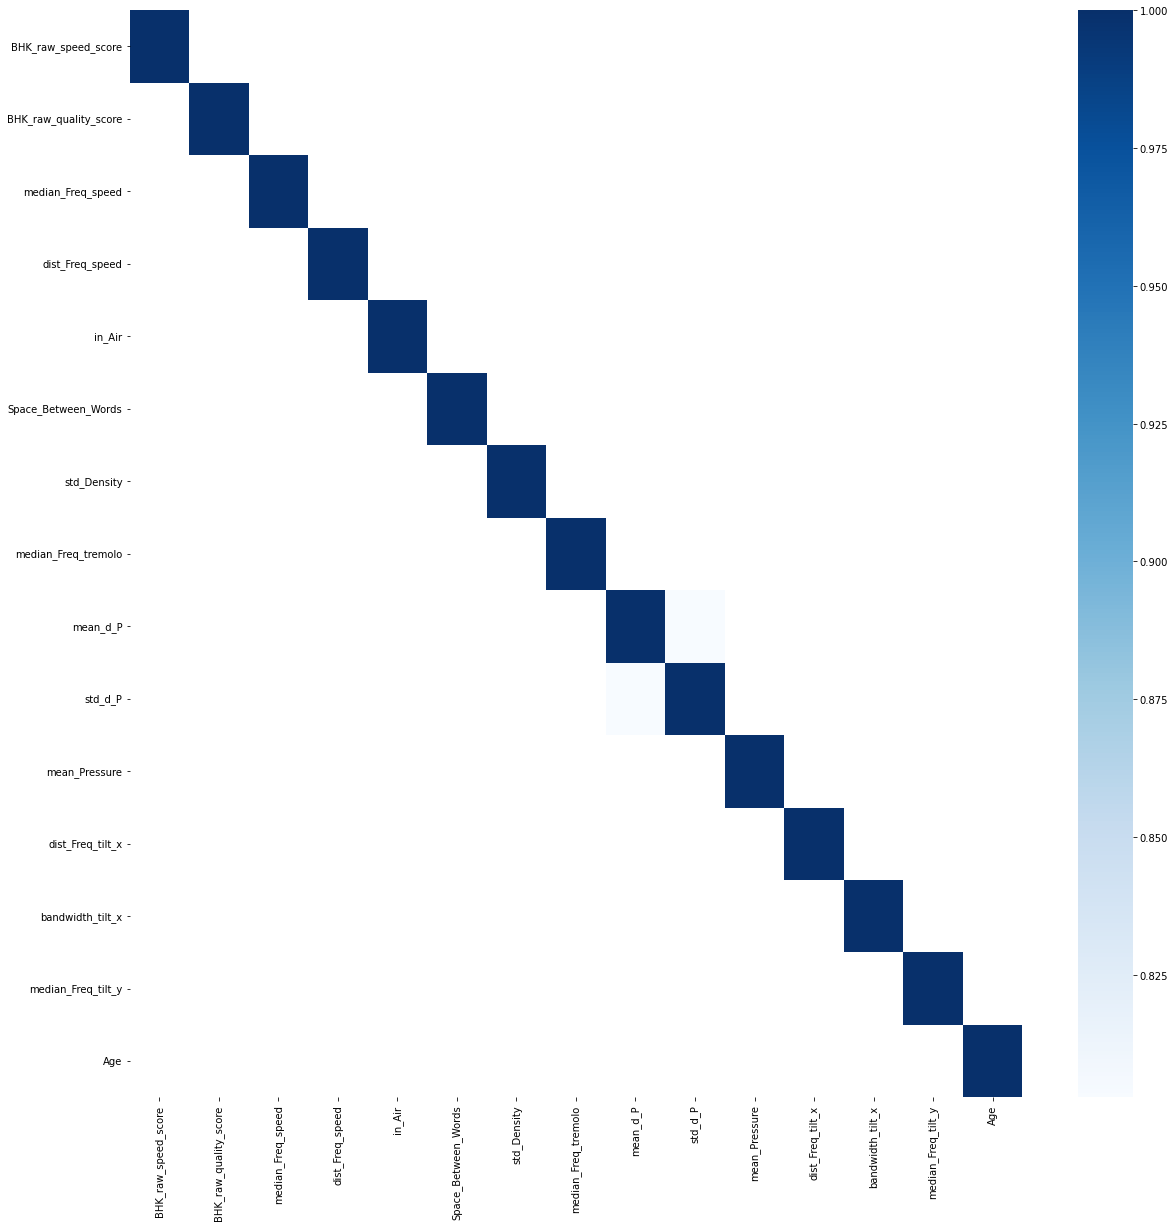

In [11]:
corrs = dv.correlation_heat_map(data[numerical_columns], 0.8)

# Numerical features visualization

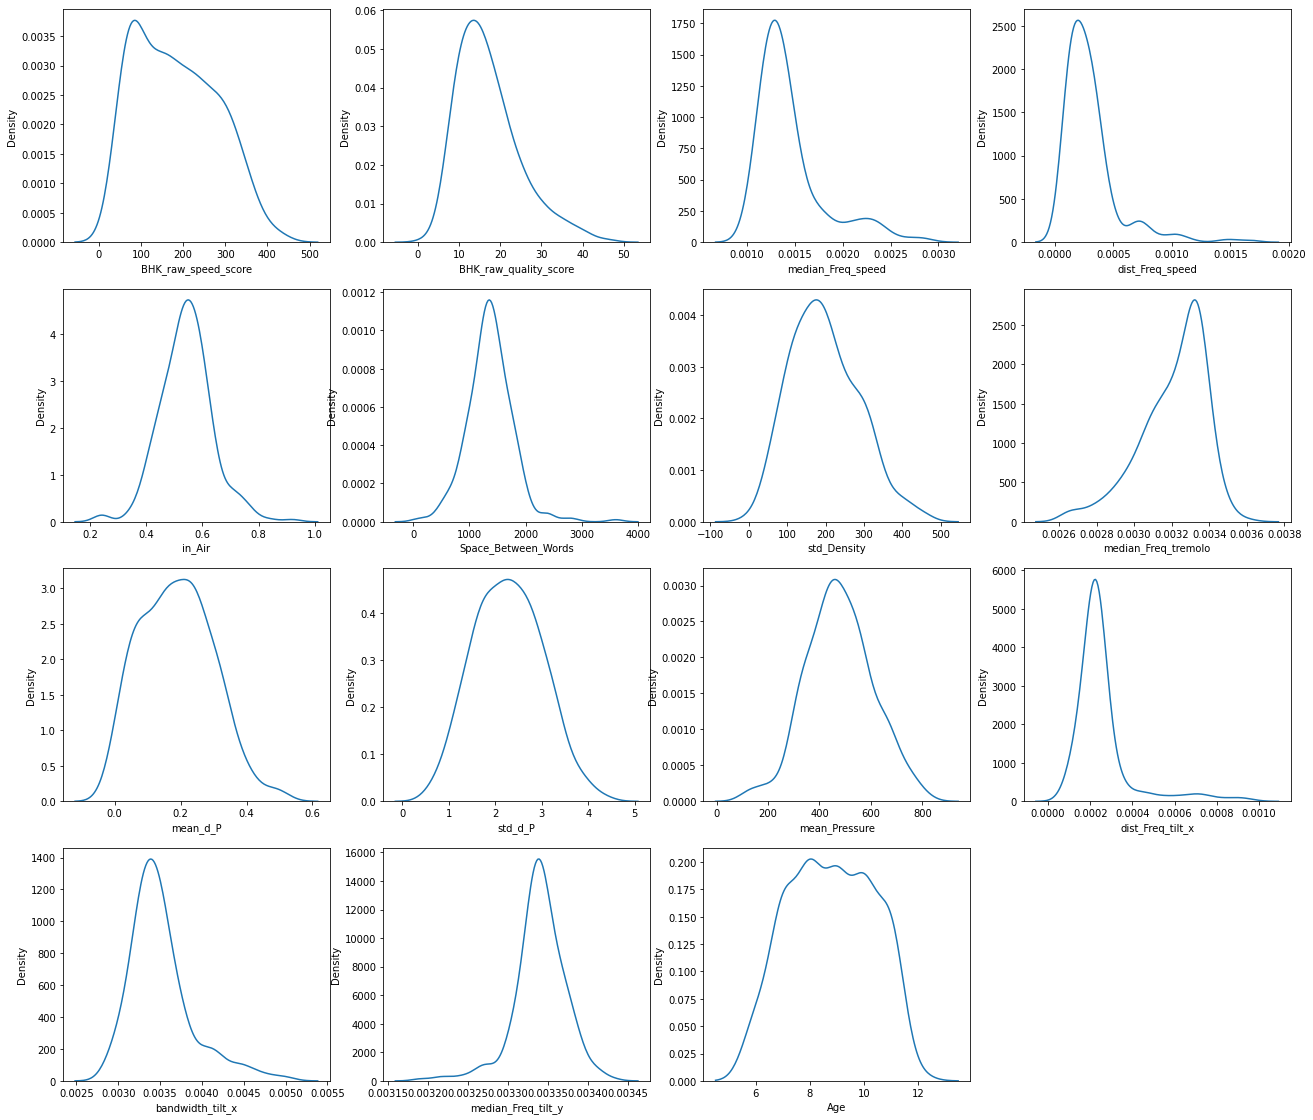

In [12]:
dv.numerical_columns_historgrams(data[numerical_columns])

In [13]:
kolmogrov_test = dv.kolmogrov_test(data[numerical_columns])
normal_distribution = kolmogrov_test[kolmogrov_test['p_value'] < 0.05]
normal_distribution

,Score,p_value
BHK_raw_speed_score,1,0
BHK_raw_quality_score,0.996429,0
median_Freq_speed,0.500407,2.28909e-65
dist_Freq_speed,0.500027,2.91784e-65
in_Air,0.624058,7.81217e-106
Space_Between_Words,1,0
std_Density,0.996429,0
median_Freq_tremolo,0.501056,1.51074e-65
mean_d_P,0.49453,9.52881e-64
std_d_P,0.825338,5.0029e-211


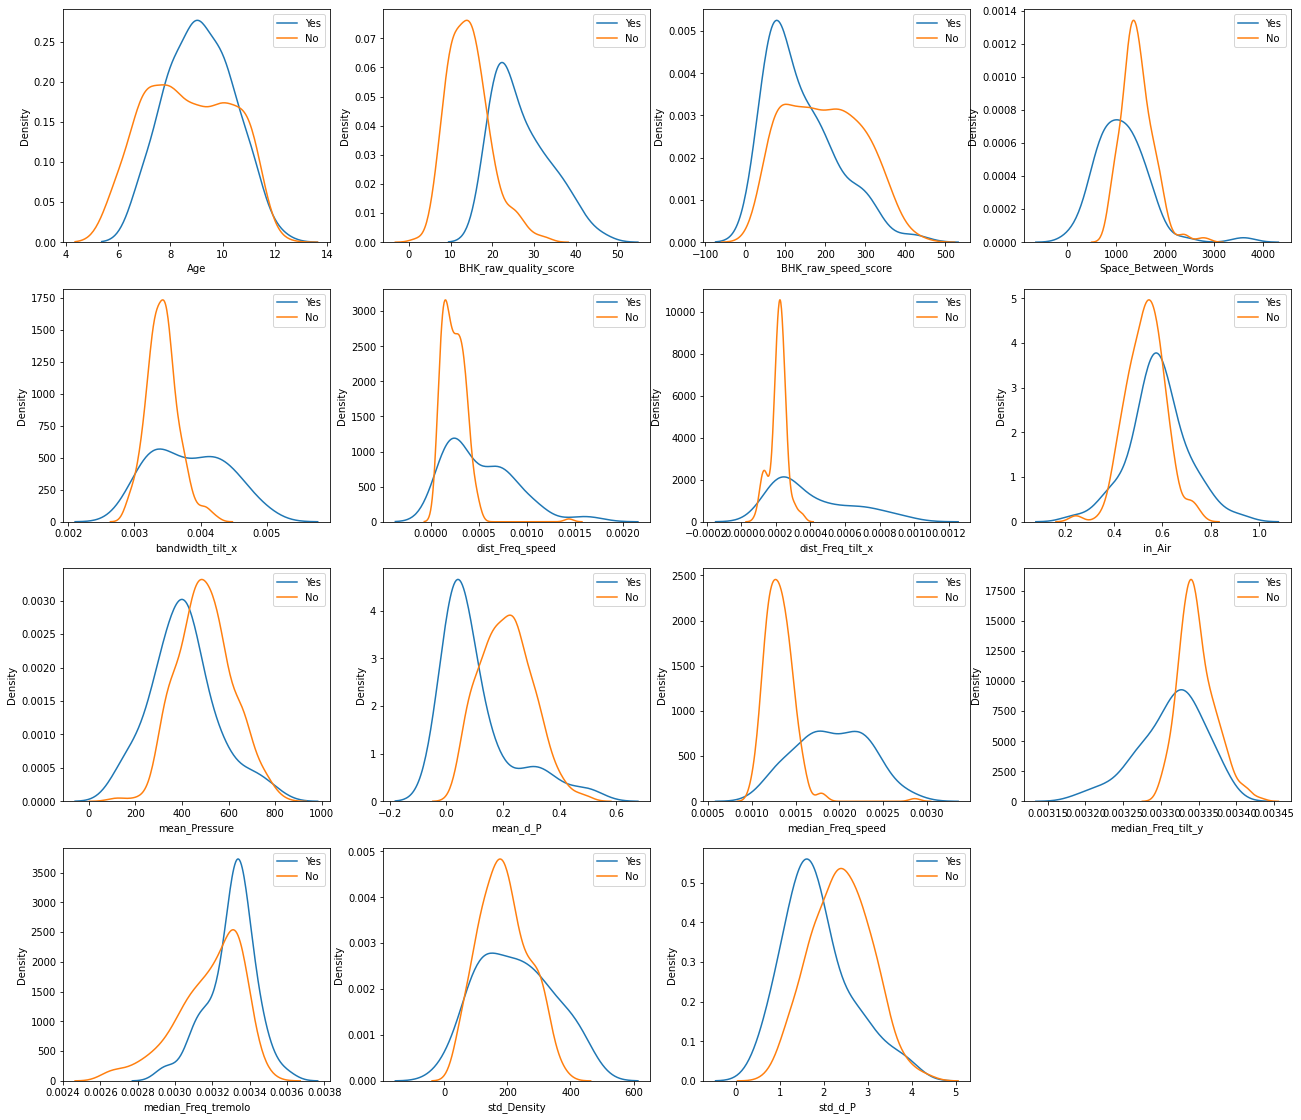

In [14]:
dv.histograms_of_numerical_columns_and_target(data, numerical_columns)

## Boxplots

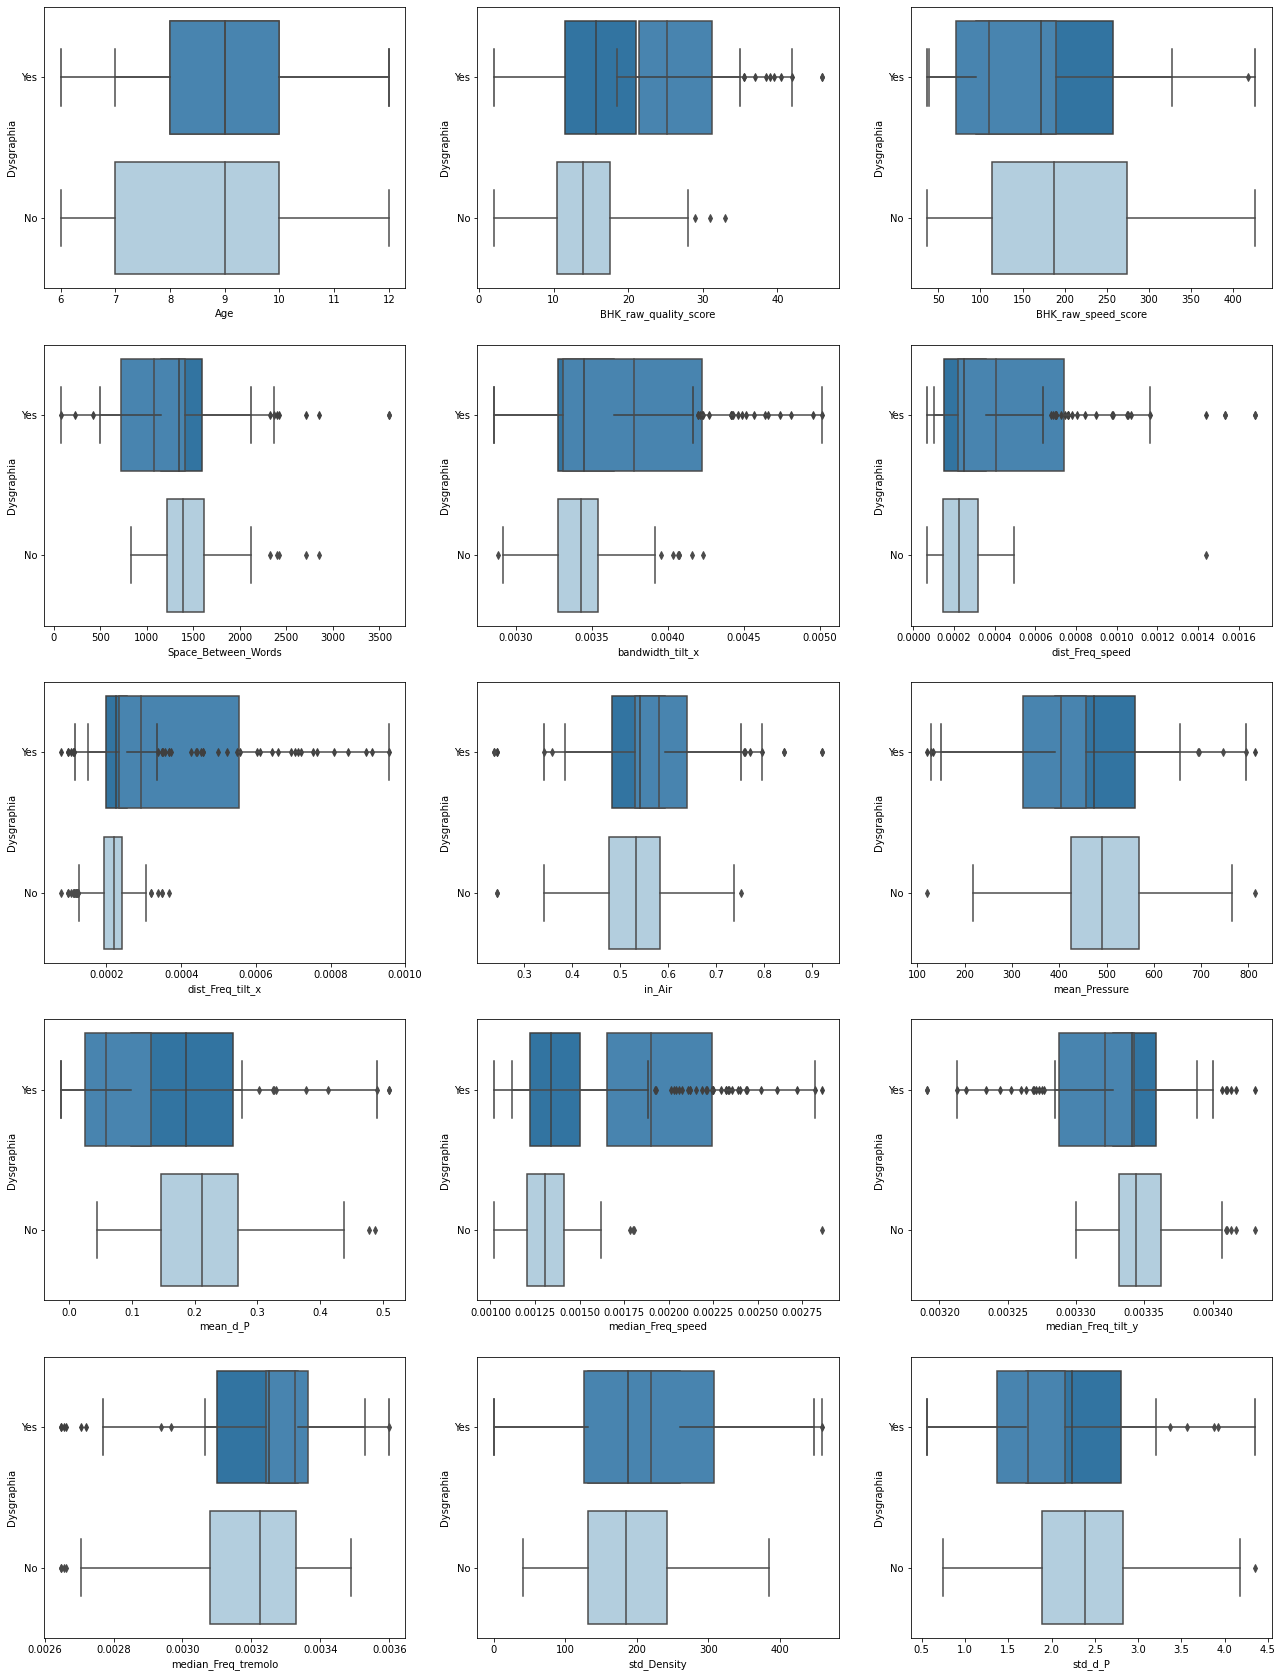

In [15]:
dv.numerical_columns_boxplots(data, numerical_columns)

# Mann Whitney Test

In [16]:
mann_w = dv.mann_whitney(data, numerical_columns)
mann_w = mann_w[mann_w.p_value < 0.05]
mann_w.sort_values(by = 'p_value', ascending = True)

,Score,p_value
BHK_raw_quality_score,164.5,7.9596e-19
median_Freq_speed,384,7.73931e-15
mean_d_P,802,1.10568e-08
dist_Freq_tilt_x,837,2.98518e-08
dist_Freq_speed,988,1.5425e-06
median_Freq_tilt_y,1002,2.16256e-06
Space_Between_Words,1135,4.23918e-05
bandwidth_tilt_x,1218,0.000219319
std_d_P,1238,0.00031806
mean_Pressure,1260,0.000473556


In [25]:
len(mann_w)

15

# Categorical Features

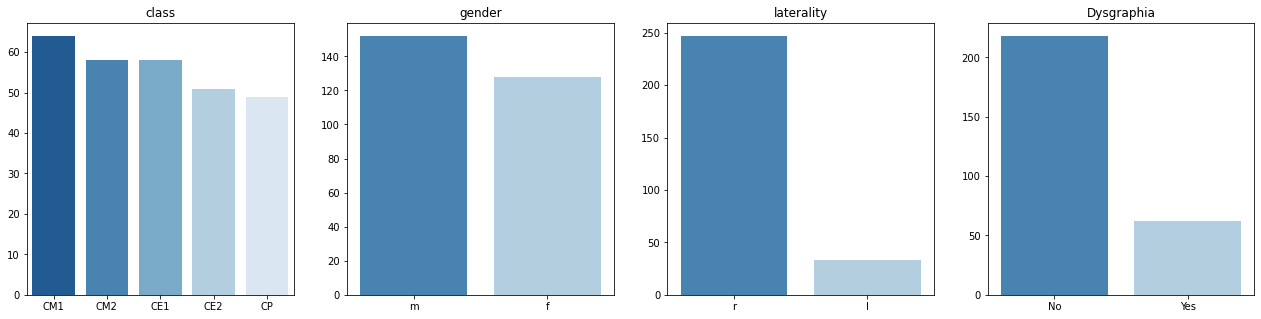

In [17]:
dv.categorical_columns_barplots(data[categorical_columns])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


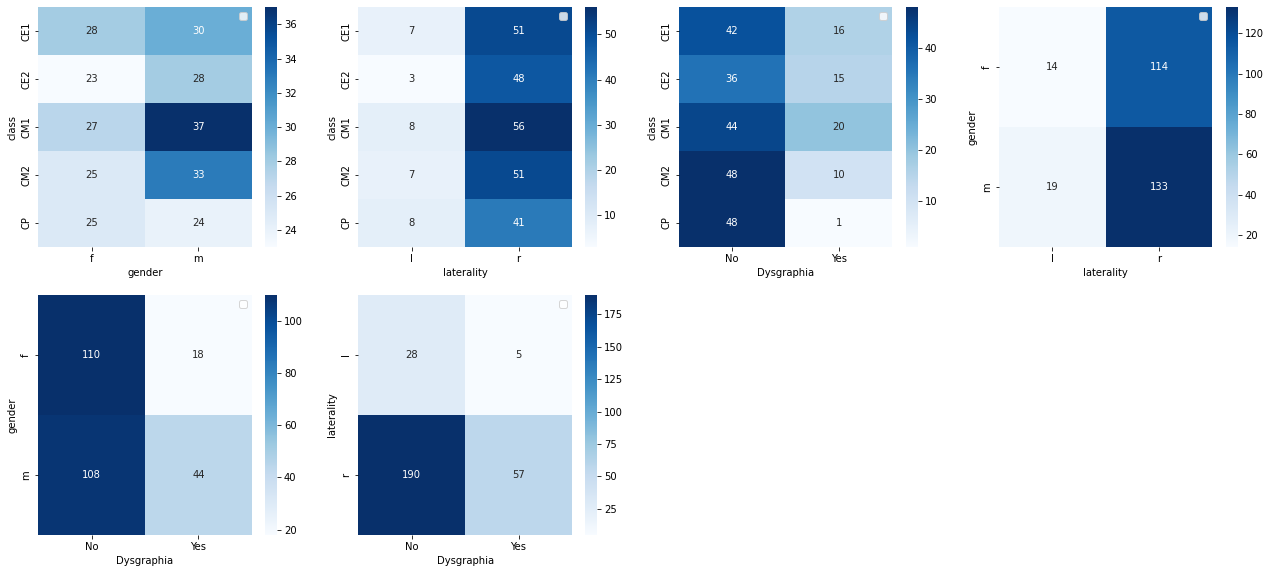

In [18]:
dv.crosstabs_categorical_columns(data, categorical_columns)

In [19]:
dv.chi_squared_test(data, categorical_columns)

(           class gender laterality Dysgraphia
 class         99    NaN        NaN        NaN
 gender       NaN     99        NaN        NaN
 laterality   NaN    NaN         99        NaN
 Dysgraphia   NaN    NaN        NaN         99,
            class gender laterality Dysgraphia
 class          0    NaN        NaN        NaN
 gender       NaN      0        NaN        NaN
 laterality   NaN    NaN          0        NaN
 Dysgraphia   NaN    NaN        NaN          0)

In [20]:
columns = list(mann_w.index)

In [21]:
new_data = pd.concat([data[columns], data.Dysgraphia], axis = 1)
new_data.head()

,BHK_raw_quality_score,median_Freq_speed,mean_d_P,dist_Freq_tilt_x,dist_Freq_speed,median_Freq_tilt_y,Space_Between_Words,bandwidth_tilt_x,std_d_P,mean_Pressure,in_Air,BHK_raw_speed_score,std_Density,median_Freq_tremolo,Age,Dysgraphia
0,25.500000,0.001744,0.130777,0.000498,0.000218,0.003318,1617.671646,0.004491,3.562989,592.221130,0.621097,207.000000,360.244714,0.003316,9,Yes
1,35.000000,0.001564,0.039345,0.000910,0.000126,0.003324,1714.428471,0.004954,1.495864,375.740844,0.587173,63.000000,303.268265,0.003233,9,Yes
2,31.333333,0.002356,-0.007538,0.000242,0.001056,0.003333,423.105339,0.003083,0.562388,127.736338,0.610327,74.000000,267.878028,0.003295,8,Yes
3,31.000000,0.001599,0.030485,0.000604,0.000136,0.003273,2371.746011,0.005016,1.560180,427.952813,0.604755,52.500000,205.989012,0.003344,8,Yes
4,22.666667,0.002250,0.025525,0.000704,0.000899,0.003388,926.590647,0.004022,1.788618,319.640759,0.770747,86.333333,230.280797,0.003338,9,Yes


In [22]:
new_data['Dysgraphia'] = new_data['Dysgraphia'].map({'Yes': 1, 'No': 0})
new_data.insert(0, 'ID', data['participant'])
new_data.head()

,ID,BHK_raw_quality_score,median_Freq_speed,mean_d_P,dist_Freq_tilt_x,dist_Freq_speed,median_Freq_tilt_y,Space_Between_Words,bandwidth_tilt_x,std_d_P,mean_Pressure,in_Air,BHK_raw_speed_score,std_Density,median_Freq_tremolo,Age,Dysgraphia
0,S0995,25.500000,0.001744,0.130777,0.000498,0.000218,0.003318,1617.671646,0.004491,3.562989,592.221130,0.621097,207.000000,360.244714,0.003316,9,1
1,S0996,35.000000,0.001564,0.039345,0.000910,0.000126,0.003324,1714.428471,0.004954,1.495864,375.740844,0.587173,63.000000,303.268265,0.003233,9,1
2,S0997,31.333333,0.002356,-0.007538,0.000242,0.001056,0.003333,423.105339,0.003083,0.562388,127.736338,0.610327,74.000000,267.878028,0.003295,8,1
3,S1000,31.000000,0.001599,0.030485,0.000604,0.000136,0.003273,2371.746011,0.005016,1.560180,427.952813,0.604755,52.500000,205.989012,0.003344,8,1
4,S1001,22.666667,0.002250,0.025525,0.000704,0.000899,0.003388,926.590647,0.004022,1.788618,319.640759,0.770747,86.333333,230.280797,0.003338,9,1


In [23]:
new_data[new_data['Dysgraphia'] == 1].describe()

,BHK_raw_quality_score,median_Freq_speed,mean_d_P,dist_Freq_tilt_x,dist_Freq_speed,median_Freq_tilt_y,Space_Between_Words,bandwidth_tilt_x,std_d_P,mean_Pressure,in_Air,BHK_raw_speed_score,std_Density,median_Freq_tremolo,Age,Dysgraphia
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,27.091398,0.001922,0.104727,0.000405,0.000514,0.003314,1118.769611,0.003826,1.868971,406.206360,0.582924,139.537941,226.180692,0.003302,9.129032,1.0
std,6.832812,0.000408,0.126720,0.000227,0.000360,0.000043,543.754553,0.000570,0.773121,142.499814,0.120493,86.613411,117.518959,0.000127,1.234529,0.0
min,18.500000,0.001122,-0.013711,0.000149,0.000103,0.003191,75.451084,0.002854,0.562388,127.736338,0.236841,39.000000,0.124984,0.002938,7.000000,1.0
25%,21.500000,0.001655,0.025540,0.000232,0.000218,0.003288,726.809782,0.003308,1.374990,322.963946,0.530413,71.125000,126.660322,0.003242,8.000000,1.0
50%,25.166667,0.001903,0.058044,0.000293,0.000404,0.003321,1079.315770,0.003777,1.729406,403.382431,0.580789,110.250000,219.744177,0.003325,9.000000,1.0
75%,31.250000,0.002246,0.130980,0.000555,0.000742,0.003342,1412.322788,0.004223,2.155612,457.542538,0.639224,190.000000,307.481630,0.003363,10.000000,1.0
max,46.000000,0.002822,0.509412,0.000956,0.001682,0.003388,3601.403094,0.005016,3.919431,795.323956,0.920067,418.000000,459.023826,0.003599,12.000000,1.0


In [24]:
new_data[new_data['Dysgraphia'] == 0].describe()

,BHK_raw_quality_score,median_Freq_speed,mean_d_P,dist_Freq_tilt_x,dist_Freq_speed,median_Freq_tilt_y,Space_Between_Words,bandwidth_tilt_x,std_d_P,mean_Pressure,in_Air,BHK_raw_speed_score,std_Density,median_Freq_tremolo,Age,Dysgraphia
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,14.405963,0.001314,0.212328,0.000215,0.000241,0.003348,1436.897967,0.003424,2.393171,498.568769,0.530834,195.911552,189.449078,0.003183,8.688073,0.0
std,5.156978,0.000179,0.091158,0.000049,0.000133,0.000024,325.424086,0.000239,0.680793,116.639415,0.080576,94.604007,77.031674,0.000179,1.604701,0.0
min,2.000000,0.001019,0.044957,0.000077,0.000067,0.003300,833.523477,0.002882,0.740116,120.594022,0.243741,36.734694,40.648274,0.002647,6.000000,0.0
25%,10.500000,0.001205,0.146186,0.000194,0.000143,0.003331,1223.116803,0.003278,1.888773,424.538323,0.475612,114.000000,131.699456,0.003080,7.000000,0.0
50%,14.000000,0.001303,0.211404,0.000221,0.000225,0.003344,1392.361004,0.003424,2.391033,489.904921,0.533209,186.961538,185.118236,0.003224,9.000000,0.0
75%,17.500000,0.001410,0.269790,0.000241,0.000317,0.003362,1615.382753,0.003540,2.824971,568.715101,0.582096,273.375000,242.227233,0.003331,10.000000,0.0
max,33.000000,0.002861,0.487426,0.000367,0.001437,0.003431,2855.477247,0.004234,4.356649,814.843005,0.751506,426.291080,385.175305,0.003489,12.000000,0.0


In [ ]:
dm.save_data(new_data, 'reduced_data')